In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('new_processed_dataset.csv')
print(data.head())
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

X = data['tweet']  # Use the 'tweet' column for text data
y = data['class']  # Use the 'class' column for labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


   hate_speech  offensive_language  neither  class  \
0            0                   0        3      2   
1            0                   3        0      1   
2            0                   3        0      1   
3            0                   2        1      1   
4            0                   6        0      1   

                                               tweet  \
0  retwet as a woman you should not complain abou...   
1  retwet boy dats coldtyga dwn bad for cufin dat...   
2  retwet dawg retwet you ever fuck a bitch and s...   
3                        retwet she lok like a trany   
4  retwet the shit you hear about me might be tru...   

                                              tokens  
0  ['retwet', 'woman', 'complain', 'cleaning', 'h...  
1  ['retwet', 'boy', 'dat', 'coldtyga', 'dwn', 'b...  
2  ['retwet', 'dawg', 'retwet', 'ever', 'fuck', '...  
3                 ['retwet', 'lok', 'like', 'trany']  
4  ['retwet', 'shit', 'hear', 'might', 'true', 'm...  


In [9]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [10]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [13]:
# Logistic Regression Pipeline
pipeline_tfidf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train and evaluate the model
pipeline_tfidf.fit(X_train_resampled, y_train_resampled)
y_pred_tfidf = pipeline_tfidf.predict(X_test_tfidf)

print("TF-IDF Encoding with Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_tfidf)
classification_report_dict = classification_report(y_test, y_pred_tfidf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

TF-IDF Encoding with Logistic Regression
Accuracy: 0.8129981606376456
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.48      0.30       281
           1       0.94      0.84      0.89      3790
           2       0.75      0.81      0.78       822

    accuracy                           0.81      4893
   macro avg       0.64      0.71      0.65      4893
weighted avg       0.87      0.81      0.83      4893

Accuracy: 0.8129981606376456
Precision: 0.866921680479108
Recall: 0.8129981606376456
F1 Score: 0.8345771726709821


Confusion Matrix:
 [[ 136  101   44]
 [ 437 3177  176]
 [  56  101  665]]


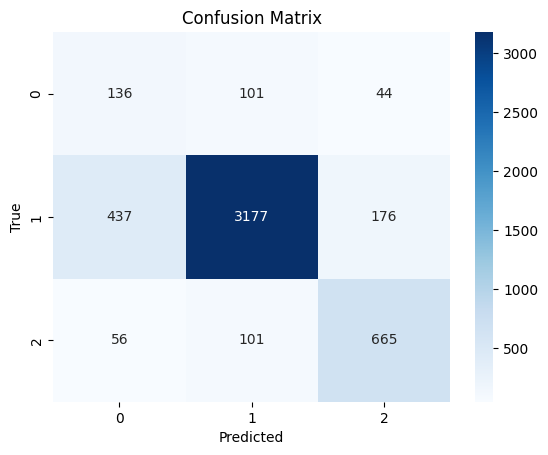

In [14]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()